<h1> Breast Cancer Project <h1>

Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

source: https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset

<h3> The aim of this project <h3>

The aim of this project is to classify tumors as benign or malignant (**binary classification**) using two non-linear **Support Vector Machines** (Gaussian and Polynomial Kernels). Subsequently, this models are compared with a classification model using **Neural Networks**.
___
Author: Bianca-Georgiana Talaba

Courses: Artificial Intelligence and Machine Learning, Scientific Programming

Computational Cognitive Science, ITAB, Università degli Studi "G. d'Annunzio" Chieti-Pescara






<h2> 1) Data exploration <h2>

<h3> The Variables <h3>

mean:
- radius mean, texture mean, perimeter mean, area mean, smoothness mean, compactness mean, concavity mean, concave points mean, symmetry mean, fractal dimension mean;

se (Standard Error):
- radius se, texture se, perimeter se, area se, smoothness se, compactness se, concavity se, concavity points se, symmetry se, fractal dimension se;

worst (more extreme value of a feature):
- radius worst, texture worst, perimeter worst, area worst, smoothness worst, compactness worst, concavity worst, concave points worst, symmetry worst, fractal dimension worst.

**Labels**: M (Malignant), B (Benign).

In [ ]:
import pandas as pd

breast_cancer=pd.read_csv('/content/drive/MyDrive/Progetto ML/breast-cancer.csv')
breast_cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


We have 569 rows, which means that there are 569 patients. The columns are 32: the first 2 contain the patients id and the labels; the remaining columns contain the features.

In [ ]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

There are no missing values and all of the values are non-null.

In [ ]:
breast_cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


We cannot compare the values with each other, so normalization must be applied (standardization).

In [ ]:
import matplotlib.pyplot as plt

tot_num=breast_cancer['diagnosis'].value_counts()
tot_num

diagnosis
B    357
M    212
Name: count, dtype: int64

These are the numbers of B and M in the diagnosis column.

In [ ]:
percentage=(tot_num/tot_num.sum()*100).round()
percentage

diagnosis
B    63.0
M    37.0
Name: count, dtype: float64

63% of tumors in the dataset are benign, 37% are malignant so the dataset is a little bit unbalanced.

Text(1, 39, '37.0')

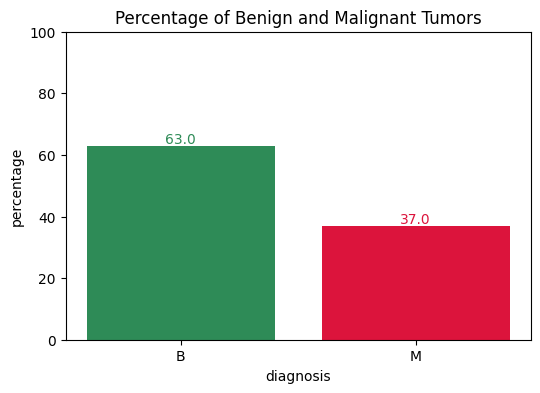

In [ ]:
#bar chart

plt.figure(figsize=(6,4))
plt.bar(percentage.index, percentage.values, color=['seagreen', 'crimson']) #HTML color codes
plt.xlabel('diagnosis')
plt.ylabel('percentage')
plt.title('Percentage of Benign and Malignant Tumors')
plt.ylim(0, 100)

plt.text(0, 65, percentage[0], horizontalalignment='center', verticalalignment='center', color='seagreen')
plt.text(1, 39, percentage[1], horizontalalignment='center', verticalalignment='center', color='crimson')

In the chart above there is a visual representation of the labels.

<h2> 2) Data analysis: Binary Classification <h2>

<h3> First method: SVM <h3>

<h3> Polynomial Kernel <h3>

In [ ]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

X=breast_cancer.iloc[:, 2:32] #30 features selection
Y=(breast_cancer['diagnosis']=='B').astype(int) #M=0 (negative class) and B=1 (positive class) (boolean instead of strings)

The Features Matrix X contains all of the 30 features.

Y is the labels vector: "M" was converted into 0 and "B" into 1. This will be useful for the Confusion Matrix, where "True negative" will mean "correctly predicted malignant tumors".

In [ ]:
X.shape #sample matrix

(569, 30)

In [ ]:
Y.shape #labels vector

(569,)

X's dimension is 569x30 (matrix) and Y's is 569x1 (vector).

In [ ]:
#Shuffling

shuffle_index=np.random.permutation(569) #array with 569 random indexes
X=X.iloc[shuffle_index] #rows selection
Y=Y.iloc[shuffle_index] #corresponding rows shuffled in the same way as X

X_train, X_test, Y_train, Y_test = X[:455], X[455:], Y[:455], Y[455:] #80% training set, 20% test set

In [ ]:
X_train.shape

(455, 30)

In [ ]:
X_test.shape

(114, 30)

In [ ]:
Y_train.shape

(455,)

In [ ]:
Y_test.shape

(114,)

80% of the samples are used for the training set, while 20% are used for the test set. Shapes are all correct.

In [ ]:
#Standardization and polynomial SVM creation

svm=SVC(kernel="poly", gamma=1, coef0=1, degree=3)

model=Pipeline(
    (
        ("scaler", StandardScaler()),
        ("svc", svm)
    )
)

In [ ]:
model.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(coef0=1, gamma=1, kernel='poly'))])

In [ ]:
#Now let's test the validity of the model

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

prediction = model.predict(X_test)

C1=confusion_matrix(Y_test, prediction)
A1=accuracy_score(Y_test, prediction)
P1=precision_score(Y_test, prediction)
R1=recall_score(Y_test, prediction)
F1_1=f1_score(Y_test, prediction)

print('Confusion Matrix:\n', C1)
print('Accuracy:', A1)
print('Precision:', P1)
print('Recall:', R1)
print('F1:', F1_1)

Confusion Matrix:
 [[42  3]
 [ 4 65]]
Accuracy: 0.9385964912280702
Precision: 0.9558823529411765
Recall: 0.9420289855072463
F1: 0.9489051094890512


Confusion Matrix:

|                   | F (predicted)| T (predicted)  |
| :---------------- | :------:     | ----:          |
| F (real)          |   TN         | FP             |
| T (real)          |   FN         | TP             |

There are 114 samples in the test set:
- 42 malignant tumors were correcly predicted;
- 65 benign tumors were correcly predicted;
- 3 tumors were predicted benign but are malignant;
- 4 tumors were predicted malignant but are benign.

The accuracy of this model is 94%, the precision is 96%.
The recall index is 94% which means that 94% of the samples were correcly identified among all truly true samples (TP+FN).
F1 is 95% (it combines precision and recall).

In conclusion, the model using a polynomial kernel SVM is very accurate.


<h3> Gaussian Kernel <h3>

In [ ]:
gaussian_svm=SVC(gamma=0.01)

gaussian_model=Pipeline(
    (
        ("scaler", StandardScaler()),
        ("gaussian_svc", gaussian_svm)
    )
)

In [ ]:
gaussian_model.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('gaussian_svc', SVC(gamma=0.01))])

In [ ]:
prediction = gaussian_model.predict(X_test)

C2=confusion_matrix(Y_test, prediction)
A2=accuracy_score(Y_test, prediction)
P2=precision_score(Y_test, prediction)
R2=recall_score(Y_test, prediction)
F1_2=f1_score(Y_test, prediction)

print('Confusion Matrix:\n', C2)
print('Accuracy:', A2)
print('Precision:', P2)
print('Recall:', R2)
print('F1:', F1_2)

Confusion Matrix:
 [[41  4]
 [ 0 69]]
Accuracy: 0.9649122807017544
Precision: 0.9452054794520548
Recall: 1.0
F1: 0.971830985915493


The gaussian model has better metrics than the polynomial one.

<h3> Second Method: Neural Networks <h3>

In this part the approach with Neural Networks will be used, which will be compared with the previous methods.

In [ ]:
from tensorflow.keras.models import *
from tensorflow.keras.layers import *

model=Sequential() #feedforward network
model.add(Dense(20, activation="relu", input_shape=[30])) #30 features for every patient
model.add(Dense(20, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

The first layer of our neural network is made up of 20 neurons with "relu" as activation function. The samples input to this layer are characterized by
30 attributes (input_shape=[30]).
The second layer has 20 neurons and the third one has 10 neurons.
The output layer contains only one neuron with sigmoid activation function, because the neural network is a binary classifier.

Let's calculate the number of trainable parameters:

- first layer: (30+1)*20=620 (+1 is the bias)

- second layer: (20+1)*20=420

- third layer: (20+1)*10=210

- output layer: (10+1)*1=11

total: 1261



In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 20)                620       
                                                                 
 dense_5 (Dense)             (None, 20)                420       
                                                                 
 dense_6 (Dense)             (None, 10)                210       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1261 (4.93 KB)
Trainable params: 1261 (4.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In the previous cell, we compiled the model specifying that the loss function to use is binary cross-entropy, the optimization algorithm is Adam, and accuracy must be monitored during the training phase.

In [ ]:
model.fit(X_train, Y_train, batch_size=200, epochs=30) #training

Epoch 1/30
3/3 [==============================] - 1s 9ms/step - loss: 22.6621 - accuracy: 0.6330
Epoch 2/30
3/3 [==============================] - 0s 6ms/step - loss: 15.2302 - accuracy: 0.6330
Epoch 3/30
3/3 [==============================] - 0s 6ms/step - loss: 8.7201 - accuracy: 0.6330
Epoch 4/30
3/3 [==============================] - 0s 7ms/step - loss: 2.7927 - accuracy: 0.6681
Epoch 5/30
3/3 [==============================] - 0s 7ms/step - loss: 1.1304 - accuracy: 0.5187
Epoch 6/30
3/3 [==============================] - 0s 8ms/step - loss: 2.6869 - accuracy: 0.3648
Epoch 7/30
3/3 [==============================] - 0s 8ms/step - loss: 2.5216 - accuracy: 0.3648
Epoch 8/30
3/3 [==============================] - 0s 7ms/step - loss: 1.3211 - accuracy: 0.4110
Epoch 9/30
3/3 [==============================] - 0s 8ms/step - loss: 0.4987 - accuracy: 0.8242
Epoch 10/30
3/3 [==============================] - 0s 8ms/step - loss: 0.7533 - accuracy: 0.8374
Epoch 11/30
3/3 [====================

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

prediction = model.predict(X_test)>0.5

C3=confusion_matrix(Y_test, prediction)
A3=accuracy_score(Y_test, prediction)
P3=precision_score(Y_test, prediction)
R3=recall_score(Y_test, prediction)
F1_3=f1_score(Y_test, prediction)

print('Confusion Matrix:\n', C3)
print('Accuracy:', A3)
print('Precision:', P3)
print('Recall:', R3)
print('F1:', F1_3)

4/4 [==============================] - 0s 3ms/step
Confusion Matrix:
 [[37  8]
 [ 1 68]]
Accuracy: 0.9210526315789473
Precision: 0.8947368421052632
Recall: 0.9855072463768116
F1: 0.9379310344827586


False positive and false negative predictions are unbalanced.

In [ ]:
model.save("breast_cancer.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In the following script, the same exercise will be performed using callbacks to save the model after each epoch and not only at the end.

In [ ]:
from tensorflow.keras import callbacks

checkpoint_cb=callbacks.ModelCheckpoint("breast_cancer.h5")
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
history=model.fit(X_train, Y_train, batch_size=200, epochs=30, callbacks=[checkpoint_cb])

Epoch 1/30
3/3 [==============================] - 1s 26ms/step - loss: 0.3527 - accuracy: 0.8857
Epoch 2/30
3/3 [==============================] - 0s 21ms/step - loss: 0.3781 - accuracy: 0.8242
Epoch 3/30
3/3 [==============================] - 0s 23ms/step - loss: 0.3399 - accuracy: 0.8901
Epoch 4/30
1/3 [=========>....................] - ETA: 0s - loss: 0.4615 - accuracy: 0.8500

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 23ms/step - loss: 0.3538 - accuracy: 0.8857
Epoch 5/30
3/3 [==============================] - 0s 22ms/step - loss: 0.2683 - accuracy: 0.9033
Epoch 6/30
3/3 [==============================] - 0s 24ms/step - loss: 0.2782 - accuracy: 0.9033
Epoch 7/30
3/3 [==============================] - 0s 21ms/step - loss: 0.2522 - accuracy: 0.9165
Epoch 8/30
3/3 [==============================] - 0s 19ms/step - loss: 0.2536 - accuracy: 0.9077
Epoch 9/30
3/3 [==============================] - 0s 22ms/step - loss: 0.2482 - accuracy: 0.9209
Epoch 10/30
3/3 [==============================] - 0s 20ms/step - loss: 0.2495 - accuracy: 0.9121
Epoch 11/30
3/3 [==============================] - 0s 21ms/step - loss: 0.2425 - accuracy: 0.9143
Epoch 12/30
3/3 [==============================] - 0s 20ms/step - loss: 0.2427 - accuracy: 0.9165
Epoch 13/30
3/3 [==============================] - 0s 21ms/step - loss: 0.2469 - accuracy: 0.9099
Epoch 14/30
3/3 [====================

In [ ]:
df=pd.DataFrame(history.history)
df.head() #it contains the history of the training

,loss,accuracy
0,0.352742,0.885714
1,0.378076,0.824176
2,0.339867,0.890110
3,0.353782,0.885714
4,0.268329,0.903297


<Axes: >

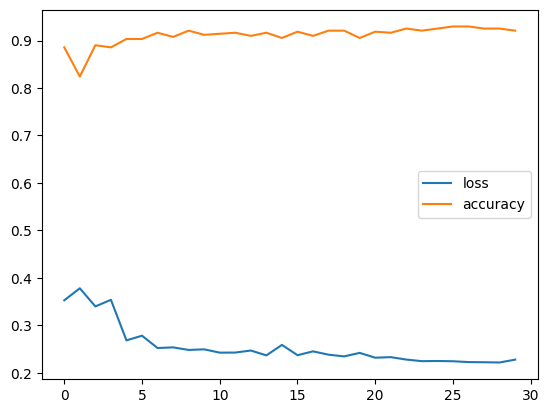

In [ ]:
import matplotlib
import pandas as pd

df=pd.DataFrame(history.history)
df.plot()

The loss function decreases while the accuracy increases as the number of epochs increases.

In [ ]:
model=load_model("breast_cancer.h5")

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

prediction = model.predict(X_test)>0.5

C4=confusion_matrix(Y_test, prediction)
A4=accuracy_score(Y_test, prediction)
P4=precision_score(Y_test, prediction)
R4=recall_score(Y_test, prediction)
F1_4=f1_score(Y_test, prediction)

print('Confusion Matrix:\n', C4)
print('Accuracy:', A4)
print('Precision:', P4)
print('Recall:', R4)
print('F1:', F1_4)

4/4 [==============================] - 0s 4ms/step
Confusion Matrix:
 [[38  7]
 [ 3 66]]
Accuracy: 0.9122807017543859
Precision: 0.9041095890410958
Recall: 0.9565217391304348
F1: 0.9295774647887325


The metrics are lower using this model.

<h3> 3) Data visualization <h3>

In this section the results obtained are prepared to be visualized through a bar chart.

In [ ]:
data=[[A1, A2, A3, A4], [P1, P2, P3, P4], [R1, R2, R3, R4], [F1_1, F1_2, F1_3, F1_4]]
df=pd.DataFrame(data, ['Accuracy', 'Precision', 'Recall', 'F1'], ['SVM (polynomial)', 'SVM (gaussian)', 'Neural Network (saving at the end)', 'Neural Network (saving after each epoch)'])
df

,SVM (polynomial),SVM (gaussian),Neural Network (saving at the end),Neural Network (saving after each epoch)
Accuracy,0.938596,0.964912,0.921053,0.912281
Precision,0.955882,0.945205,0.894737,0.904110
Recall,0.942029,1.000000,0.985507,0.956522
F1,0.948905,0.971831,0.937931,0.929577


In [ ]:
df_t=df.T
df_t

,Accuracy,Precision,Recall,F1
SVM (polynomial),0.938596,0.955882,0.942029,0.948905
SVM (gaussian),0.964912,0.945205,1.000000,0.971831
Neural Network (saving at the end),0.921053,0.894737,0.985507,0.937931
Neural Network (saving after each epoch),0.912281,0.904110,0.956522,0.929577


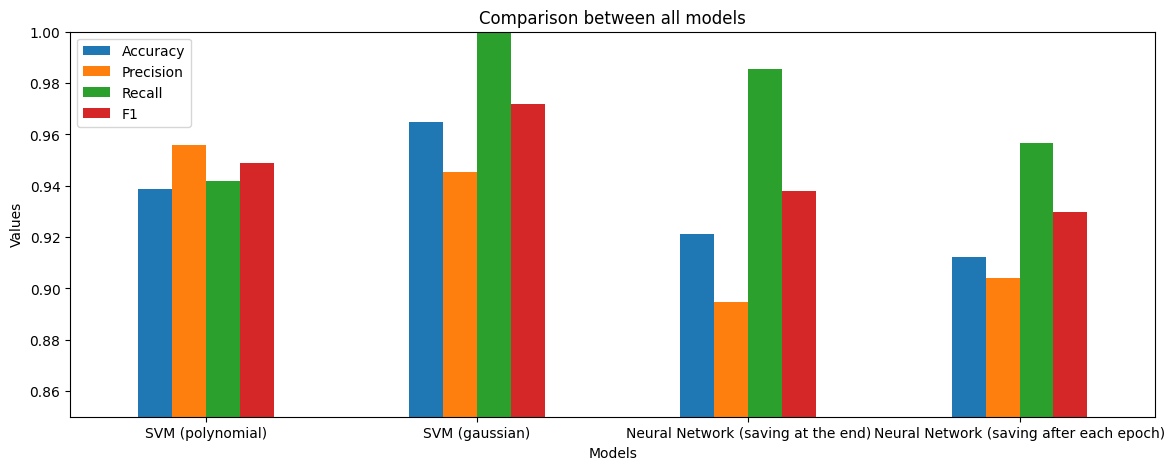

In [ ]:
#bar chart
chart = df_t.plot(kind='bar', figsize=(14, 5))

plt.xlabel('Models')
plt.ylabel('Values')
plt.title('Comparison between all models')
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.ylim(0.85, 1) #zoom to see the differences better
plt.show()

<h2> 4) Conclusion <h2>

The results show that for a binary classification for the identification of breast tumors (malignant and benign) all of the models are valid, but the gaussian SVM has got better metrics.